In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Reading data from a CSV file and removing NA values

filePath = '/content/drive/MyDrive/Colab Notebooks/Reprezenatcja wiedzy w AI/BostonHousing.csv'

df = pd.read_csv(filePath)
df.dropna(inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


In [4]:
data = df.values
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

### Data compression

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
pca = PCA(n_components=6)
data_6d = pca.fit_transform(scaled_data)

[0.46856985017176006, 0.5866165934119375, 0.6825275047464503, 0.7457598013088274, 0.8064612156561233, 0.8536476331063333, 0.8918616995221975, 0.9204693707322661, 0.9400136443138951, 0.9579633156179567, 0.9731905156225492, 0.9862227831320608]


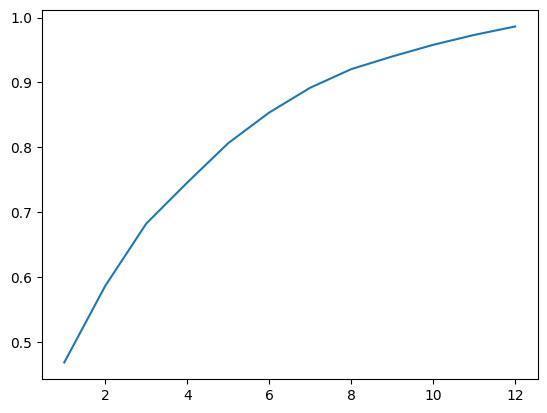

In [7]:
# Determination of the variance coefficient

components = np.arange(1, scaled_data.shape[1] - 1)
variance = []

for i in components:
    pca = PCA(n_components=i)
    pca.fit_transform(scaled_data)
    variance.append(np.cumsum(pca.explained_variance_ratio_)[-1])

plt.plot(components, variance)
print(variance)

### Pattern identification in the dataset

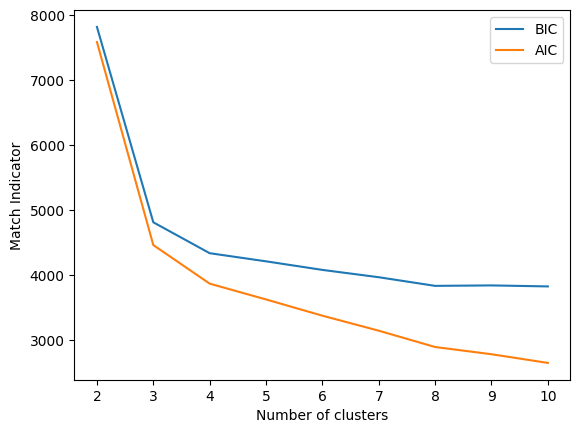

In [8]:
bics, aics = [], []
clusters = np.arange(2, 11)

for k in clusters:
  gmm = GaussianMixture(n_components=k, n_init=10)
  gmm.fit(data_6d)
  bics.append(gmm.bic(data_6d))
  aics.append(gmm.aic(data_6d))

plt.plot(clusters, bics, label='BIC')
plt.plot(clusters, aics, label='AIC')

plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Match Indicator')

plt.show()

In [9]:
np.argmin(bics) + 2

10

In [10]:
np.argmin(aics) + 2

10

### Determination of anomalies in the dataset

In [11]:
gmm = GaussianMixture(n_components=10)
gmm.fit(data_6d)

GaussianMixture(n_components=10)

In [12]:
densities = gmm.score_samples(data_6d)
density_threshold = np.percentile(densities, 10)
anomalies = data_6d[densities < density_threshold]

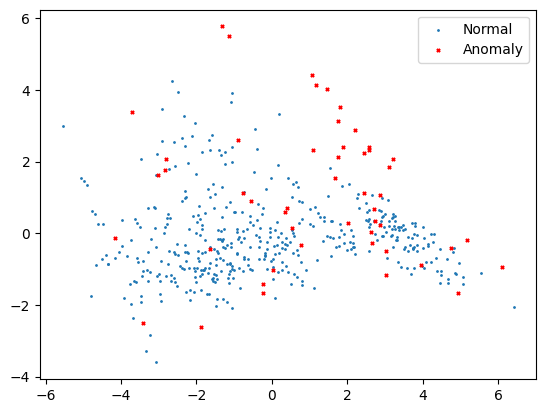

In [13]:
plt.scatter(data_6d[:, 0], data_6d[:, 1], s=1, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], s=5, marker='x', c='red', label='Anomaly')

plt.legend()
plt.show()

### Anomalies removal

In [14]:
data_6d_clear = data_6d[~np.isin(data_6d, anomalies).all(axis=1)]

In [15]:
assert data_6d_clear.shape[0] == data_6d.shape[0] - anomalies.shape[0]

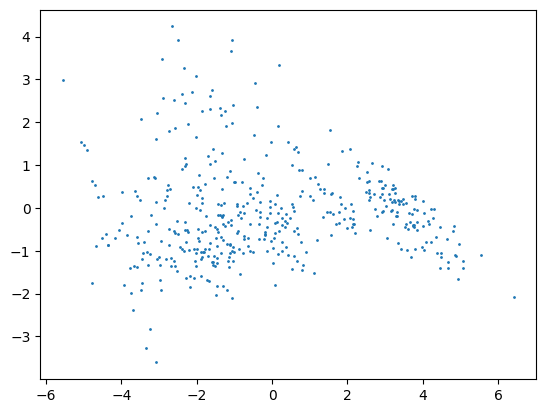

In [16]:
plt.scatter(data_6d_clear[:, 0], data_6d_clear[:, 1], s=1)